In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#loading data
dataset = pd.read_csv('cleaned_2_final_data.csv')
dataset = dataset.sort_values(by='date')  #sort by date
dataset

,Unnamed: 0,tt,date,dt,db,freq,day_or_night,weather,power,band,pos_towers,average_distance
0,187,2003,20210420,0.179741,-11.456897,1379.543103,0,0,7.0,40,1,1351.000000
1,185,1147,20210420,0.381513,-16.596639,1493.764706,1,0,10.0,20,13,1430.076923
2,184,1702,20210420,0.139944,-12.810056,1449.164804,1,0,NaN,40,0,NaN
3,188,2035,20210420,0.192593,-11.592593,1340.518519,0,0,7.0,20,1,1802.000000
4,189,1435,20210420,0.076531,-13.918367,1595.153061,1,0,NaN,20,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
501,462,929,20240305,0.058273,-13.258993,1633.971223,1,0,9.0,20,5,2633.200000
502,466,1404,20240307,0.347674,-12.523256,1430.720930,1,0,10.0,40,38,488.473684
503,467,1351,20240307,0.242400,-12.784000,1462.256000,1,0,10.0,20,53,1096.000000
504,474,1732,20240315,0.149640,-13.611511,1323.546763,1,0,6.0,40,21,497.380952


In [3]:
dataset['date'] = dataset['date'].astype(str)    #convert date into string
dataset['tt'] = dataset['tt'].astype(int)        #convert tt into integer
dataset.describe()                               #provides summary statistics for numeric columns

,Unnamed: 0,tt,dt,db,freq,day_or_night,weather,power,band,pos_towers,average_distance
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0,480.000000,506.000000,506.000000,480.000000
mean,252.500000,1419.907115,0.133812,-13.470648,1452.868905,0.891304,0.0,7.306250,29.994071,11.918972,1018.882125
std,146.213884,400.835634,0.163499,1.973003,172.014814,0.311565,0.0,1.698569,10.016717,10.293483,516.886185
min,0.000000,1.000000,-1.300000,-20.000000,522.500000,0.000000,0.0,5.000000,17.000000,0.000000,5.000000
25%,126.250000,1119.000000,0.076048,-14.673070,1363.225452,1.000000,0.0,6.000000,20.000000,4.000000,583.888889
50%,252.500000,1404.000000,0.139567,-13.248494,1461.913818,1.000000,0.0,7.000000,30.000000,9.000000,912.062500
75%,378.750000,1658.000000,0.204302,-12.110651,1539.831654,1.000000,0.0,9.000000,40.000000,17.000000,1400.450000
max,505.000000,2333.000000,0.585714,-8.413681,2425.000000,1.000000,0.0,10.000000,40.000000,60.000000,3265.000000


<Axes: xlabel='date'>

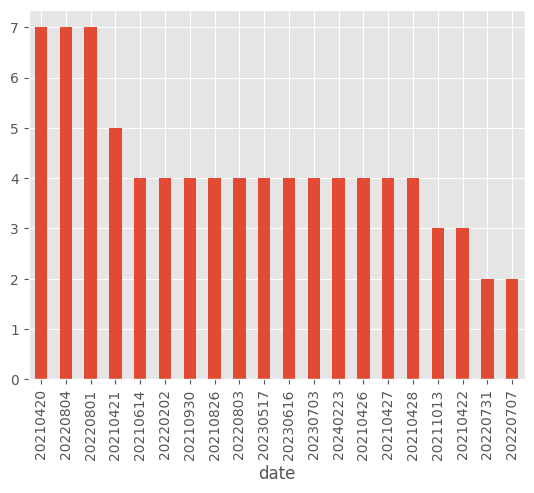

In [4]:
#no. of times tt happended at date - most of the times transmission sent is 7 times on 20210420
dataset['date'].value_counts().head(20).plot(kind='bar')    #for top 20 values

<Axes: xlabel='tt'>

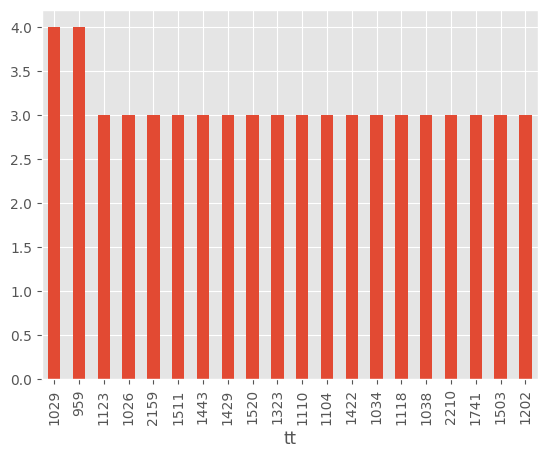

In [5]:
# most transmissions are made in morning b/w 10am - 3pm
dataset['tt'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='dt'>

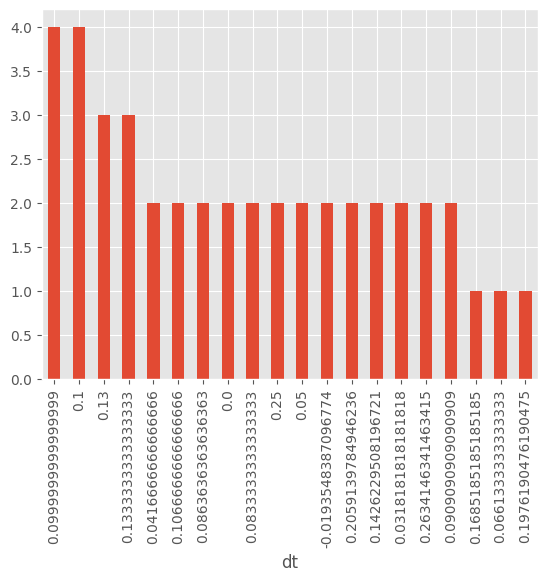

In [6]:
# most time offset occured b/w 0.05-0.2 sec
dataset['dt'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='db'>

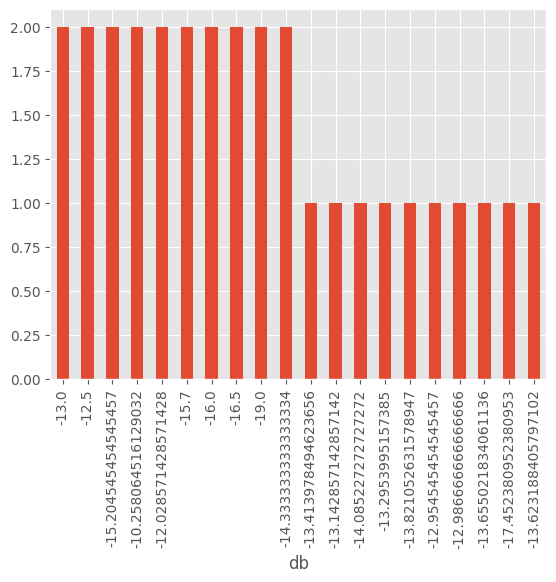

In [7]:
# most frequent log(s/n) ratio is b/w -13 to -15 
dataset['db'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='freq'>

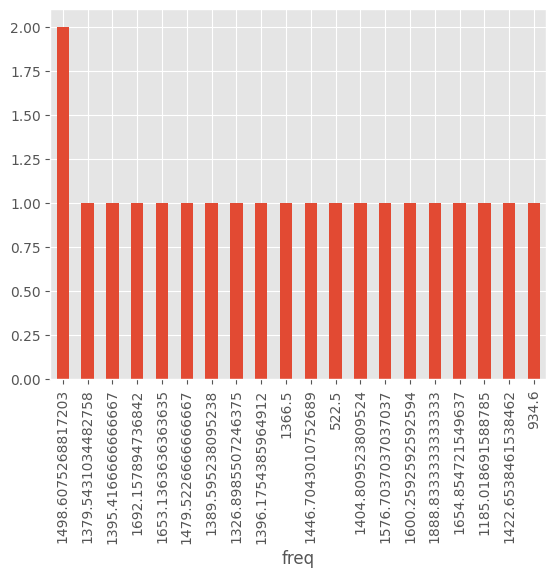

In [8]:
# 1300 to 1600 hz frequency offset is observed to be most frequent
dataset['freq'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='day_or_night'>

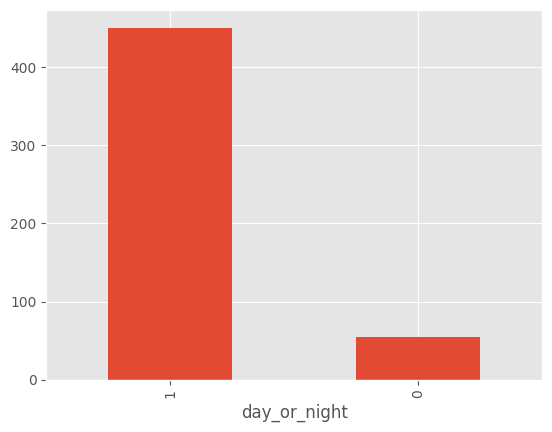

In [9]:
#significantly higher number of observations during the day (represented by 1) compared to the night (represented by 0).
dataset['day_or_night'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='power'>

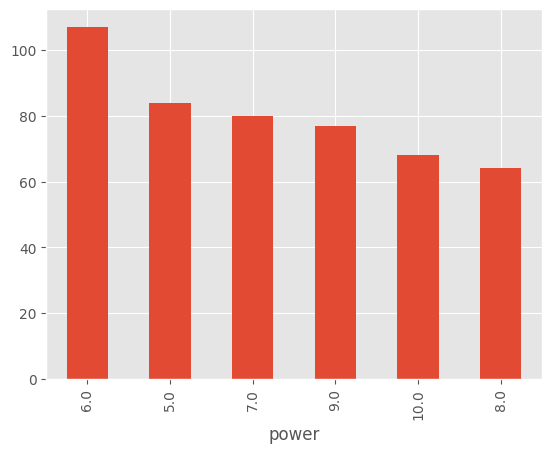

In [10]:
#most frequent power of our transmission was 6W
dataset['power'].value_counts().head(40).plot(kind='bar')

<Axes: xlabel='band'>

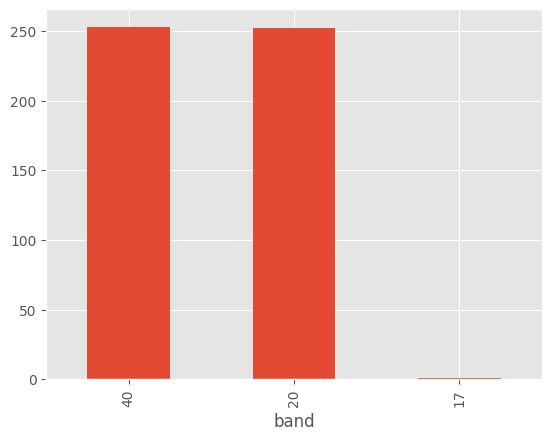

In [11]:
#two bands (40 and 20) having similar high counts around 250 each, and a significantly lower count for band 17
dataset['band'].value_counts().head(40).plot(kind='bar')

<Axes: xlabel='pos_towers'>

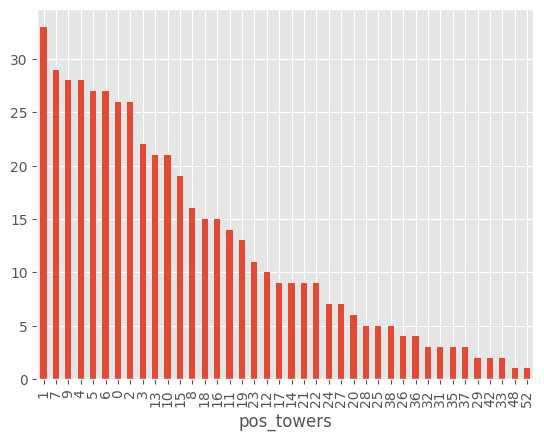

In [12]:
#pos towers - no. of entities analysis ----- showing that lower counts of positive towers are more common, with the highest frequency observed at 7 positive towers.
dataset['pos_towers'].value_counts().head(40).plot(kind='bar')

<Axes: xlabel='average_distance'>

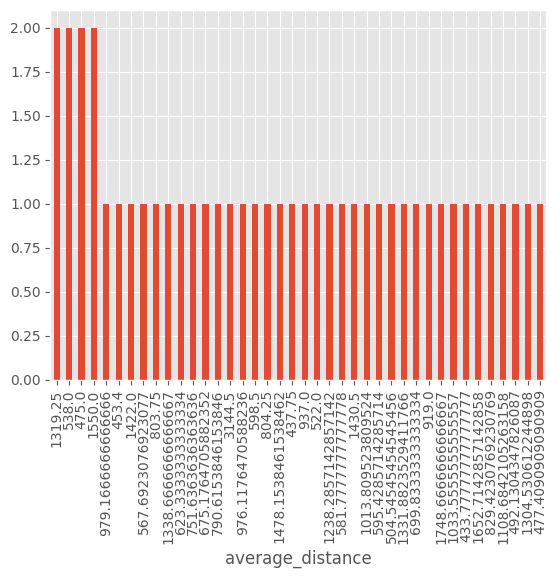

In [13]:
#bar graph shows the frequency distribution of the average_distance variable, with multiple distinct distances having an equal count of 2 occurrences each.
dataset['average_distance'].value_counts().head(40).plot(kind='bar')

**Correlation Analysis**

In [14]:
dataset

,Unnamed: 0,tt,date,dt,db,freq,day_or_night,weather,power,band,pos_towers,average_distance
0,187,2003,20210420,0.179741,-11.456897,1379.543103,0,0,7.0,40,1,1351.000000
1,185,1147,20210420,0.381513,-16.596639,1493.764706,1,0,10.0,20,13,1430.076923
2,184,1702,20210420,0.139944,-12.810056,1449.164804,1,0,NaN,40,0,NaN
3,188,2035,20210420,0.192593,-11.592593,1340.518519,0,0,7.0,20,1,1802.000000
4,189,1435,20210420,0.076531,-13.918367,1595.153061,1,0,NaN,20,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
501,462,929,20240305,0.058273,-13.258993,1633.971223,1,0,9.0,20,5,2633.200000
502,466,1404,20240307,0.347674,-12.523256,1430.720930,1,0,10.0,40,38,488.473684
503,467,1351,20240307,0.242400,-12.784000,1462.256000,1,0,10.0,20,53,1096.000000
504,474,1732,20240315,0.149640,-13.611511,1323.546763,1,0,6.0,40,21,497.380952


<Axes: xlabel='average_distance', ylabel='pos_towers'>

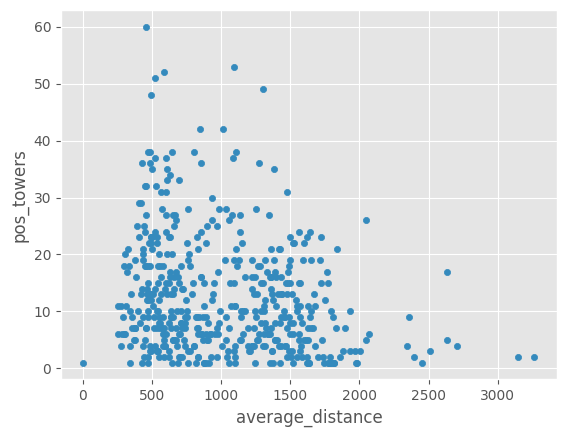

In [15]:
# indicating a potential inverse relationship where higher average_distance tends to correspond to fewer pos_towers
dataset.plot(kind='scatter' , x='average_distance' , y='pos_towers')

<Axes: xlabel='date'>

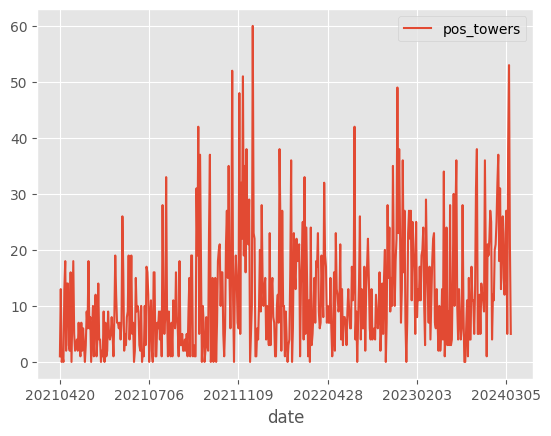

In [16]:
#shows the trend of pos_towers over time, indicating fluctuations in the number of positive towers across different dates
dataset.plot(kind='line' , x='date' , y='pos_towers')

<Axes: xlabel='date'>

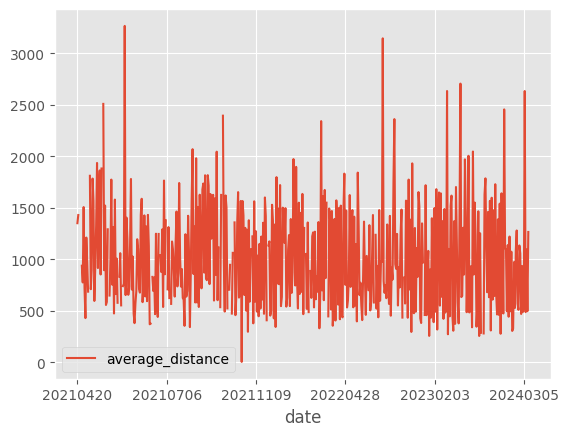

In [17]:
#shows the trend of average_dist over time
dataset.plot(kind='line' , x='date' , y='average_distance')

<Axes: xlabel='tt', ylabel='pos_towers'>

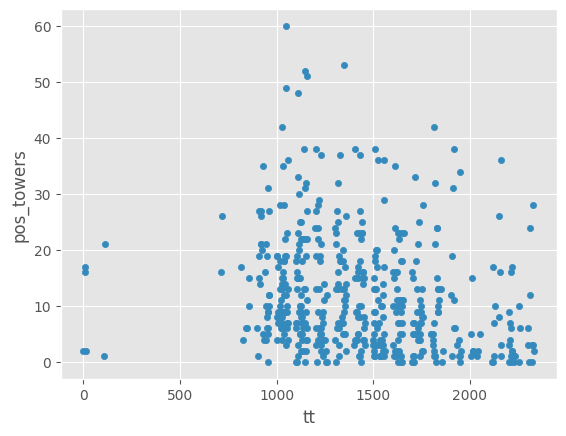

In [18]:
#shows the relationship between tt and pos_towers, with no clear linear pattern, indicating variability in the number of positive towers across different tt values
dataset.plot(kind='scatter' , x='tt' , y='pos_towers')

<Axes: xlabel='tt', ylabel='average_distance'>

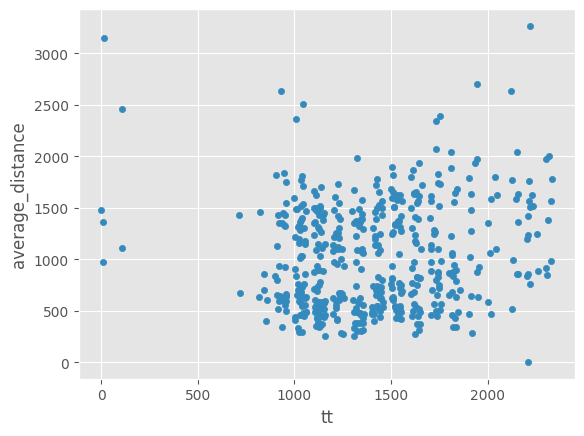

In [19]:
#shows the relationship between tt and average_distance, indicating a wide range of average distances across different tt values without a clear linear trend
dataset.plot(kind='scatter' , x='tt' , y='average_distance')

<Axes: xlabel='dt', ylabel='pos_towers'>

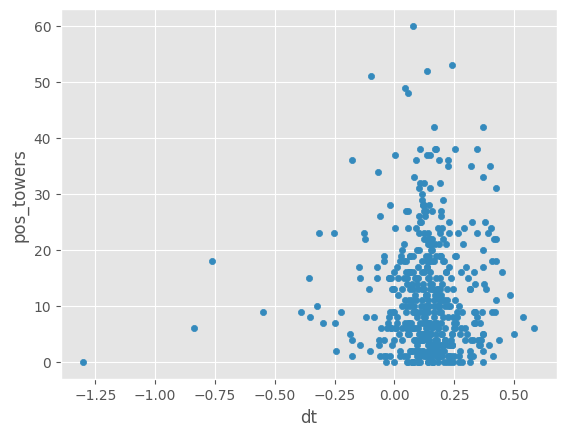

In [20]:
#indicating a clustering of positive towers around dt values close to zero, with some spread as dt increases or decreases.
# when dt is near 0.17 success is highest
dataset.plot(kind='scatter' , x='dt' , y='pos_towers')

<Axes: xlabel='dt', ylabel='average_distance'>

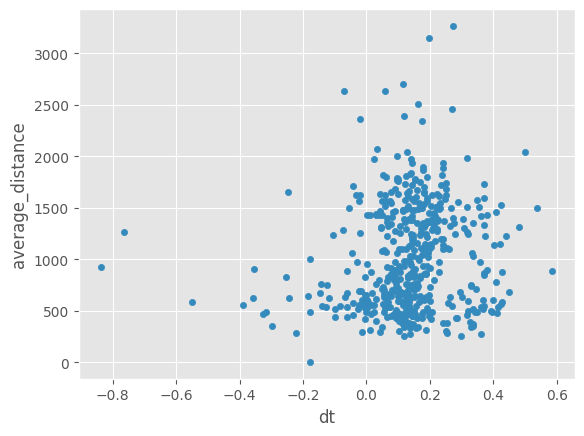

In [21]:
#indicating that average distances are more varied and slightly concentrated when dt is near 0.17.
# when dt is near 0.17 sccess is highest
dataset.plot(kind='scatter' , x='dt' , y='average_distance')

<Axes: xlabel='db', ylabel='pos_towers'>

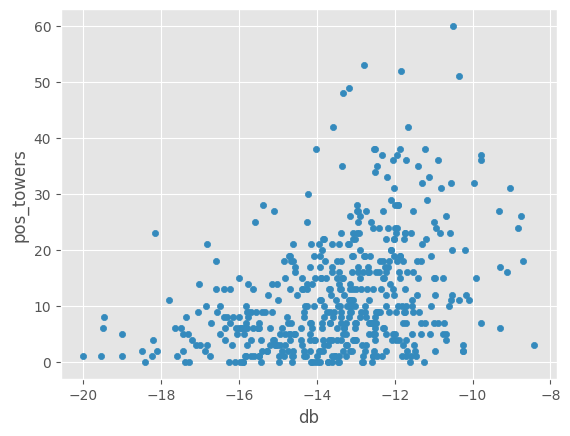

In [22]:
#indicating that higher counts of positive towers tend to occur as db values increase towards -10
# when db increases no of pos_towers (success) always increase
dataset.plot(kind='scatter' , x='db' , y='pos_towers')

<Axes: xlabel='db', ylabel='average_distance'>

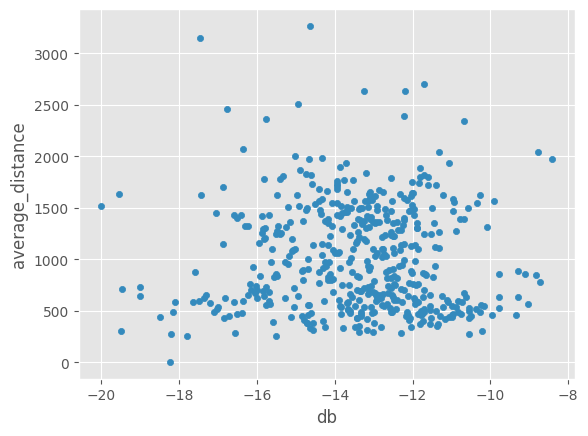

In [23]:
#indicating a wide distribution of average distances across different db values, with no clear linear trend
dataset.plot(kind='scatter' , x='db' , y='average_distance')

<Axes: xlabel='freq', ylabel='pos_towers'>

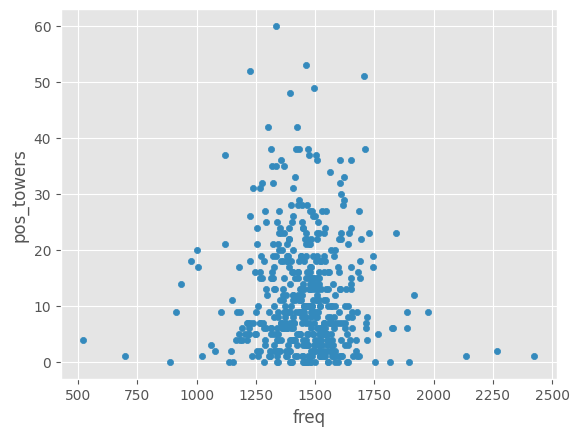

In [24]:
#The data points are clustered around certain frequency values, particularly between 1000 and 1500, indicating that most pos tower counts are observed within this frequency range. No clear trend.
dataset.plot(kind='scatter' , x='freq' , y='pos_towers')

<Axes: xlabel='freq', ylabel='average_distance'>

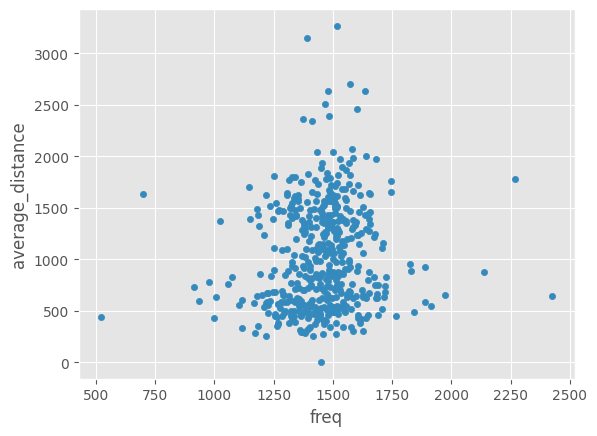

In [25]:
#data points are densely clustered around the frequency range of 1000 to 1500
dataset.plot(kind='scatter' , x='freq' , y='average_distance')

<Axes: xlabel='day_or_night', ylabel='pos_towers'>

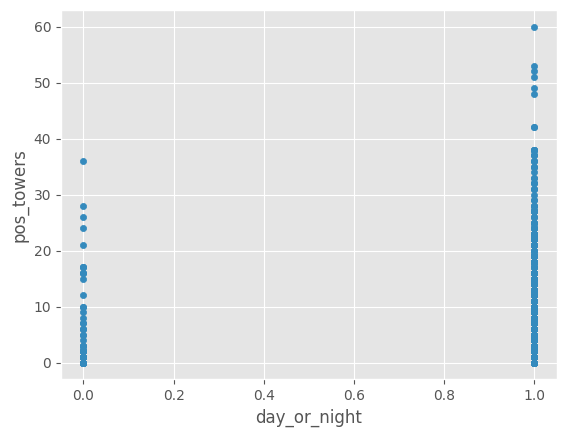

In [26]:
#data points are tightly clustered along the vertical lines at 0 and 1 in x-axis
dataset.plot(kind='scatter' , x='day_or_night' , y='pos_towers')

<Axes: xlabel='day_or_night', ylabel='average_distance'>

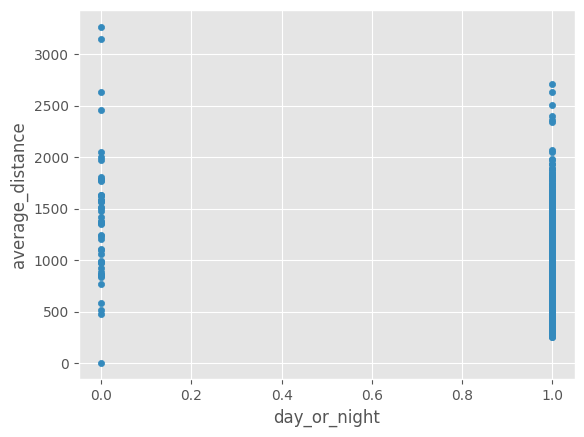

In [27]:
##data points are tightly clustered along the vertical lines at 0 and 1 in x-axis
dataset.plot(kind='scatter' , x='day_or_night' , y='average_distance')

<Axes: xlabel='power', ylabel='pos_towers'>

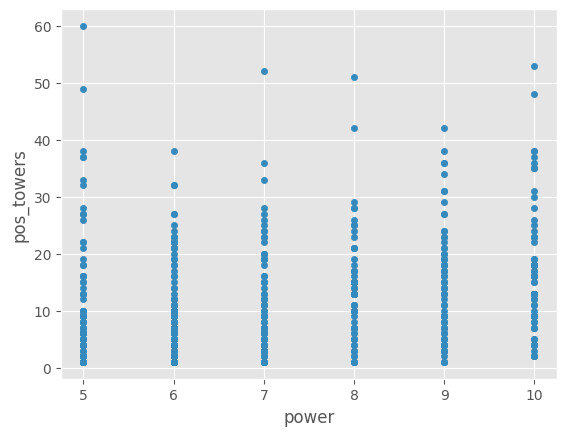

In [28]:
#does not show a clear relationship or trend between the power levels and the number of pos towers
dataset.plot(kind='scatter' , x='power' , y='pos_towers')

<Axes: xlabel='power', ylabel='average_distance'>

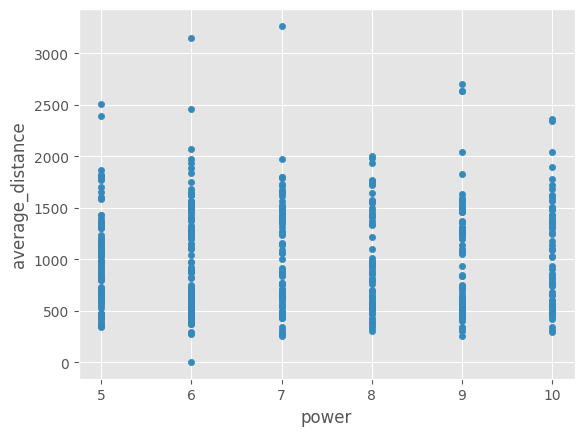

In [29]:
dataset.plot(kind='scatter' , x='power' , y='average_distance')

<Axes: xlabel='band', ylabel='pos_towers'>

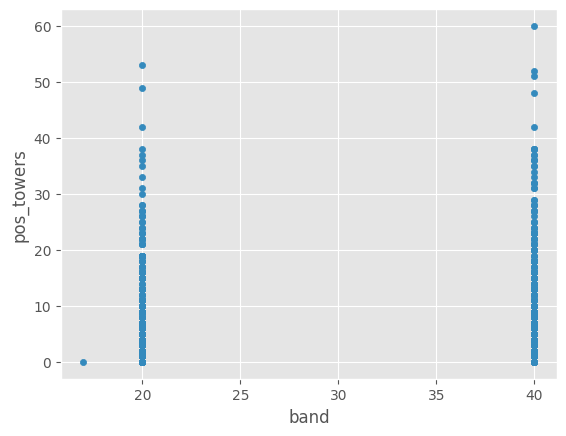

In [30]:
dataset.plot(kind='scatter' , x='band' , y='pos_towers')

<Axes: xlabel='band', ylabel='average_distance'>

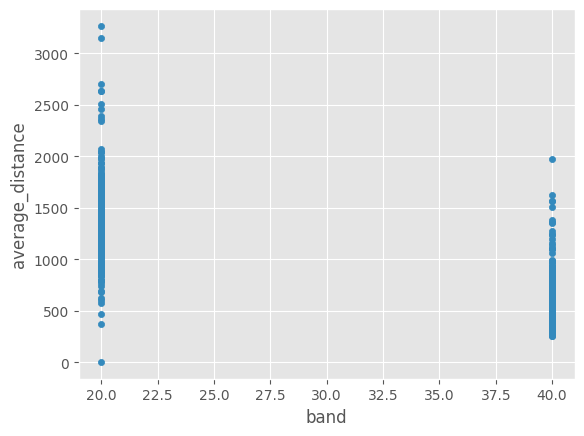

In [31]:
dataset.plot(kind='scatter' , x='band' , y='average_distance')

In [32]:
dataset.columns    #command will display the names of all the columns in the DataFrame

Index(['Unnamed: 0', 'tt', 'date', 'dt', 'db', 'freq', 'day_or_night',
       'weather', 'power', 'band', 'pos_towers', 'average_distance'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

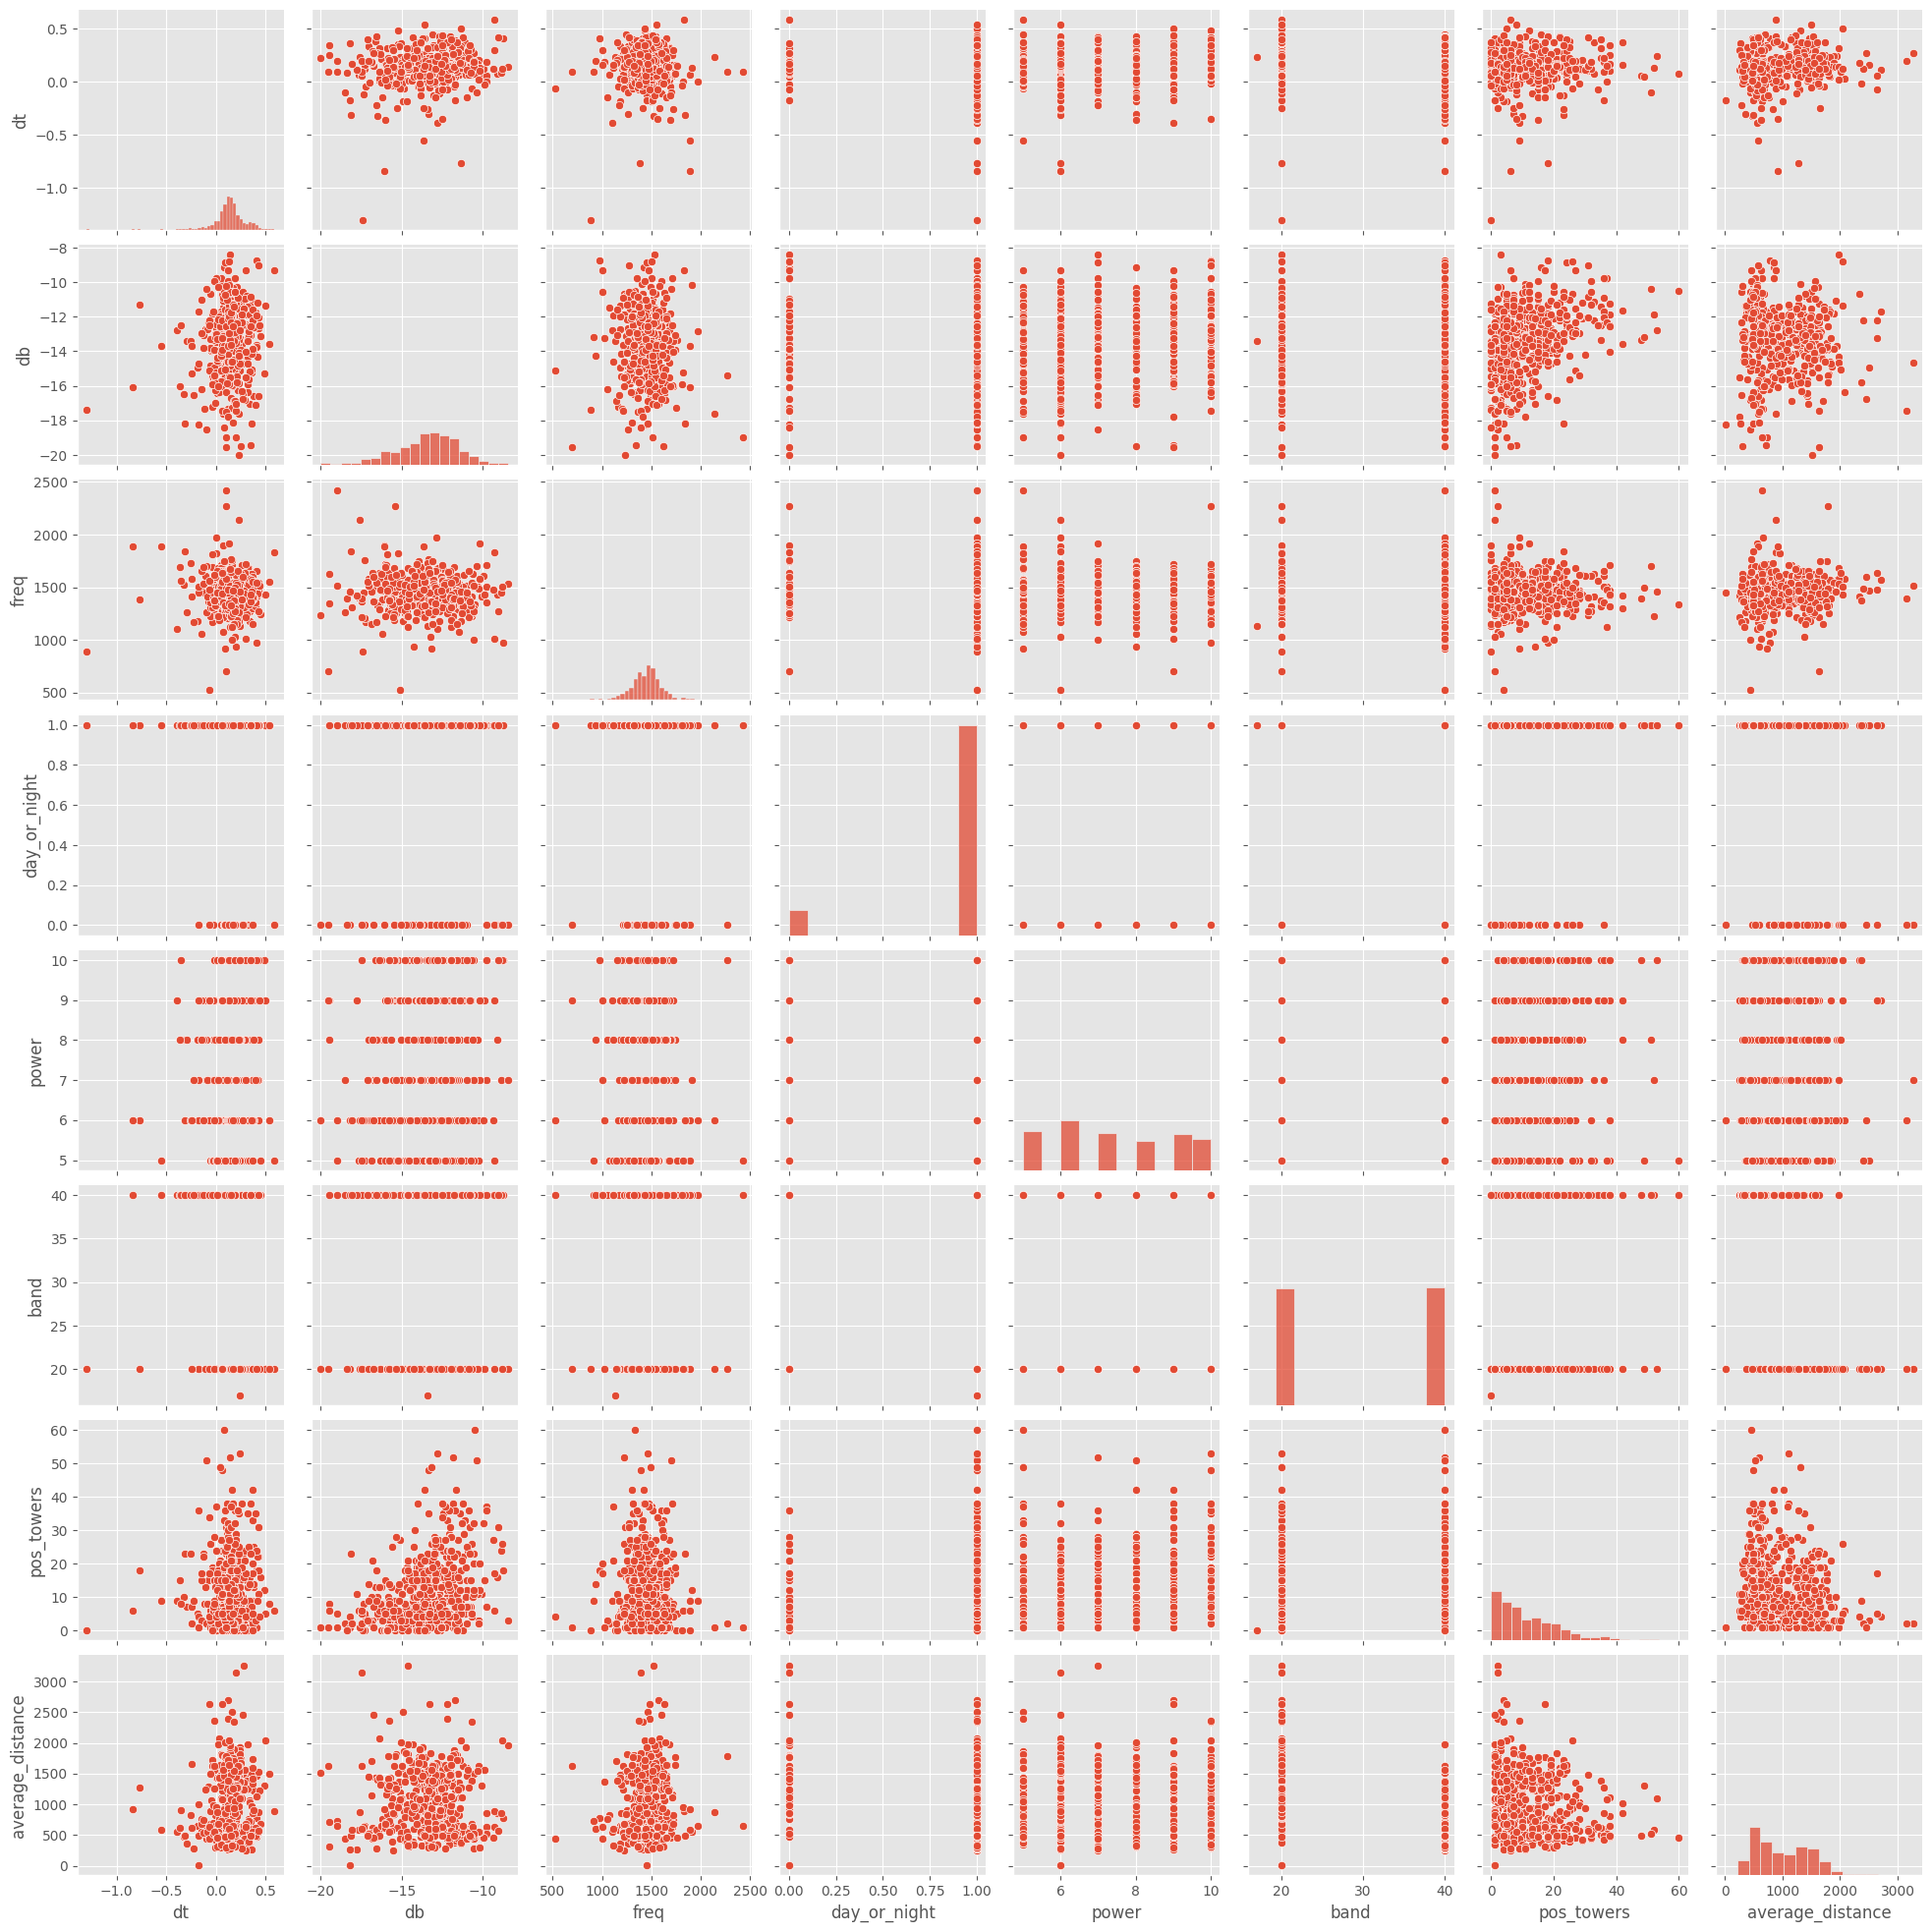

In [33]:
sns.pairplot(dataset , vars=['dt' , 'db' , 'freq' , 
                       'day_or_night' , 'power' , 'band','pos_towers','average_distance'])

In [34]:
#.corr() computes the pairwise correlation of the selected columns
df_corr = dataset[['dt' , 'db' , 'freq' , 
                       'day_or_night' , 'power' , 'band','pos_towers','average_distance']].corr()

<Axes: >

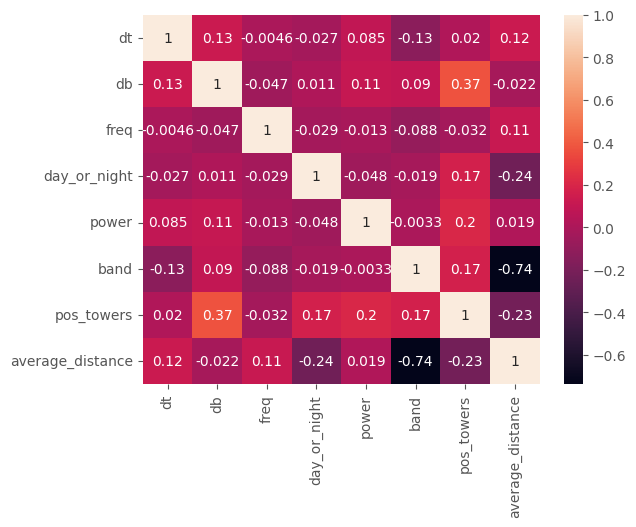

In [35]:
sns.heatmap(df_corr , annot=True)

The correlation coefficient ranges from -1 to 1:
   1 indicates a perfect positive correlation.
   -1 indicates a perfect negative correlation.
   0 indicates no correlation.

*Correlations with pos_towers:
*db: 0.37 (Moderate positive correlation),
power: 0.20 (Weak positive correlation),
band: 0.17 (Weak positive correlation),
day_or_night: 0.17 (Weak positive correlation),
average_distance: -0.23 (Weak negative correlation),
dt: 0.02 (No significant correlation),
freq: -0.032 (No significant correlation, but negative),

*Correlations with average_distance:
*band: -0.74 (Strong negative correlation),
day_or_night: -0.24 (Weak negative correlation),
pos_towers: -0.23 (Weak negative correlation),
dt: 0.12 (No significant correlation),
freq: 0.11 (No significant correlation),
db: -0.022 (No significant correlation),
power: 0.019 (No significant correlation),



**PCA**

In [36]:
selected_columns = ['dt' , 'db' , 'freq' , 'day_or_night' , 'power' , 'band','pos_towers','average_distance']

# Create a new dataframe with only the selected columns
cleaned_df = dataset[selected_columns]
cleaned_df = cleaned_df.dropna()

In [37]:
#Standerd scalling
from sklearn.preprocessing import StandardScaler    #used for standardizing features by removing the mean and scaling to unit variance.
#Normalizing
scaler = StandardScaler()
scaler.fit(cleaned_df)    #fit method is applied to the cleaned_df DataFrame, which computes the mean and standard deviation for each feature in the dataset. These statistics are stored in the scaler object.

StandardScaler()

(480, 8)


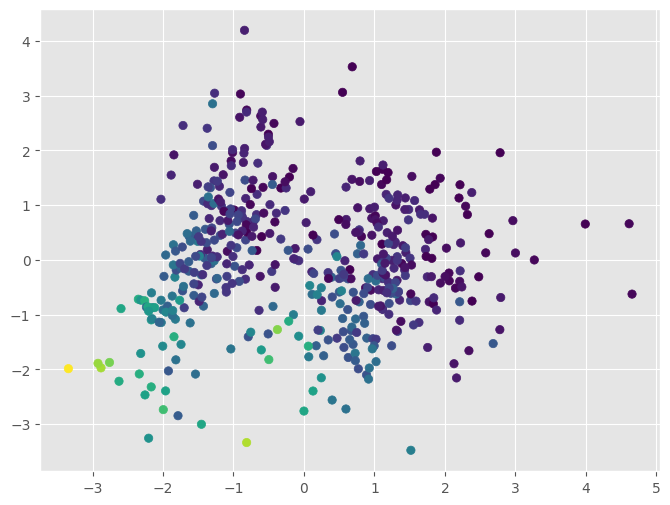

In [38]:
scaled_data = scaler.transform(cleaned_df)    #uses the previously fitted StandardScaler to transform the cleaned_df DataFrame, ensuring all features have a mean of 0 and a standard deviation of 1
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   #creates a PCA object that will reduce the dataset to 2 principal components.
pca.fit(scaled_data)        #This line fits the PCA model to the standardized data
x_pca = pca.transform(scaled_data)  #containing the transformed data with 2 principal components
print(scaled_data.shape)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0] , x_pca[:,1] , c = cleaned_df['pos_towers'])    #creates a scatter plot of the first and second principal components.

The points are colored according to the "pos_towers" values, indicating how the data points are distributed and clustered in the reduced two-dimensional space.

**it shows that there exist a trend, and it can be seggregated
**

(480, 8)


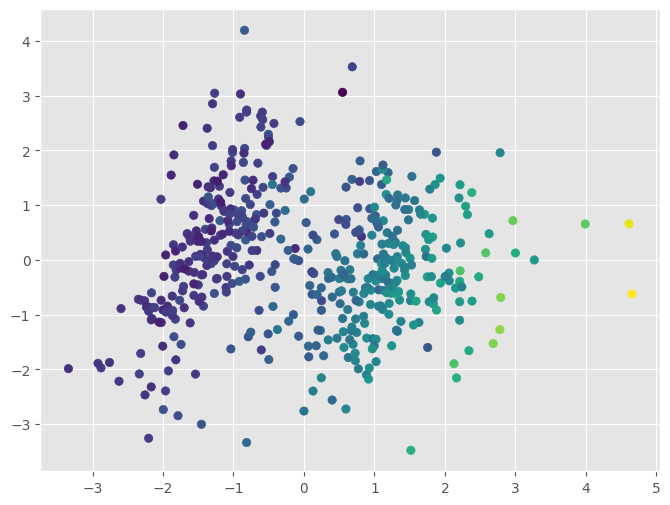

In [39]:
scaled_data = scaler.transform(cleaned_df)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0] , x_pca[:,1] , c = cleaned_df['average_distance'])

The points are colored according to the "average_distance" values, indicating how the data points are distributed and clustered in the reduced two-dimensional space.


****it shows that there exist a trend, and it can be seggregated